In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import os
import glob

In [7]:
#Read in colour images
def images_reader(directory):
    final = []
    for images in glob.glob(directory+"/*.jpg"):
        image = cv2.imread(images, cv2.IMREAD_COLOR)
        resize = cv2.resize(image, (150 , 150))
        final.append(resize)
    return final

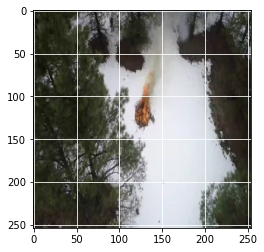

In [3]:
#Plot four sequencial images that haven't been resized
#Edit the directory links if you have them stored in a separate location

image1 = '//Users//Ryan1//Desktop//CE888 - 2020//Assignment//Training//Fire//resized_frame3.jpg'
image2 = '//Users//Ryan1//Desktop//CE888 - 2020//Assignment//Training//Fire//resized_frame4.jpg'
image3 = '//Users//Ryan1//Desktop//CE888 - 2020//Assignment//Training//Fire//resized_frame5.jpg'
image4 = '//Users//Ryan1//Desktop//CE888 - 2020//Assignment//Training//Fire//resized_frame6.jpg'

sample = cv2.imread(image1, cv2.IMREAD_COLOR)
sample_rgb = cv2.cvtColor(sample,cv2.COLOR_BGR2RGB)
#plt.figure(figsize = (6,6))
plt.imshow(sample_rgb)
plt.grid(color = 'w')

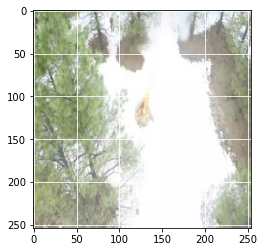

In [4]:
sample1 = cv2.imread(image2, cv2.IMREAD_COLOR)
sample1_rgb = cv2.cvtColor(sample1,cv2.COLOR_BGR2RGB)
#plt.figure(figsize = (6,6))
plt.imshow(sample1_rgb)
plt.grid(color = 'w')

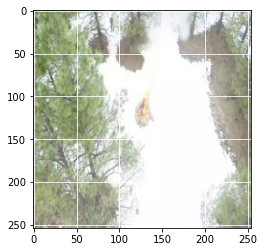

In [5]:
sample2 = cv2.imread(image3, cv2.IMREAD_COLOR)
sample2_rgb = cv2.cvtColor(sample2,cv2.COLOR_BGR2RGB)
#plt.figure(figsize = (6,6))
plt.imshow(sample2_rgb)
plt.grid(color = 'w')

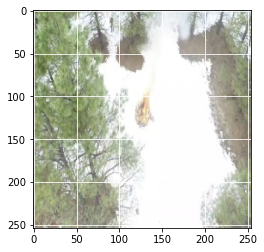

In [6]:
sample3 = cv2.imread(image4, cv2.IMREAD_COLOR)
sample3_rgb = cv2.cvtColor(sample3,cv2.COLOR_BGR2RGB)
#plt.figure(figsize = (6,6))
plt.imshow(sample3_rgb)
plt.grid(color = 'w')

In [8]:
#Create variables for colour arrays

#Edit the directory links if you have them stored in a separate location
train_fire_dir = '//Users//Ryan1//Desktop//CE888 - 2020//Assignment//Training//Fire'
train_no_fire_dir = '//Users//Ryan1//Desktop//CE888 - 2020//Assignment//Training//No_Fire'
test_fire_dir = '//Users//Ryan1//Desktop//CE888 - 2020//Assignment//Test//Fire'
test_no_fire_dir = '//Users//Ryan1//Desktop//CE888 - 2020//Assignment//Test//No_Fire'

fire_train = np.array(images_reader(train_fire_dir))
no_fire_train = np.array(images_reader(train_no_fire_dir))
fire_test = np.array(images_reader(test_fire_dir))
no_fire_test = np.array(images_reader(test_no_fire_dir))

In [9]:
#Looks at various arrays using the fire training set as an example

#Shape contains [Images, height, width, colour channel]
print(fire_train.shape)
#Shape just looks at the first colour channel
print(fire_train[:,:,:,0].shape)
#Shape looks at the first image,first colour channel and all the pixels
print(fire_train[0,:,:,0])
#Shape looks at the first pixel of the first image for the first colour channel
print(fire_train[0,0,0,0])

(25018, 150, 150, 3)
(25018, 150, 150)
[[211 216 218 ...  49  68  77]
 [215 220 220 ...  88  99  84]
 [221 222 222 ...  89  92  77]
 ...
 [223 225 229 ... 134 131 128]
 [224 225 228 ... 131 130 126]
 [224 224 228 ... 129 128 129]]
211


In [9]:
#Looks at the image types
print(fire_train.dtype)
print(no_fire_train.dtype)
print(fire_test.dtype)
print(no_fire_test.dtype)

uint8
uint8
uint8
uint8


In [10]:
#Finds the colour channels of the first image's pixel at a height of [1] and width of [2] 
fire_train[0][1, 2]

array([62, 67, 58], dtype=uint8)

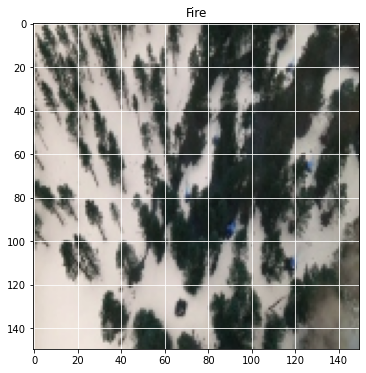

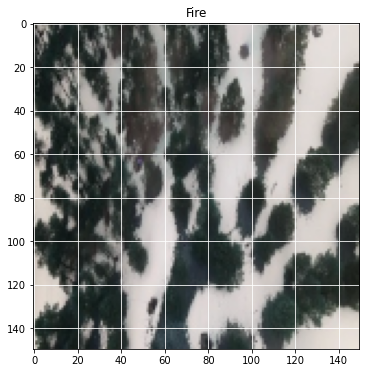

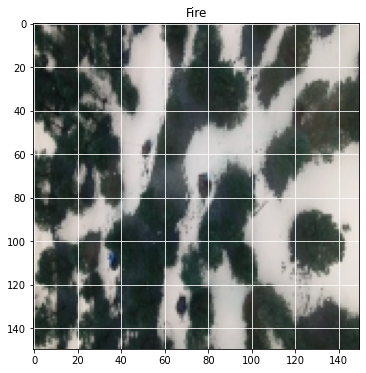

In [10]:
#shows the first three images of training_data
for i in range(3):
    plt.figure(figsize = (6,6))
    plt.imshow(fire_train[i])
    plt.grid(color = 'w')
    plt.title('Fire')

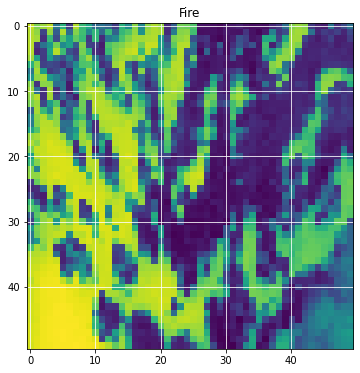

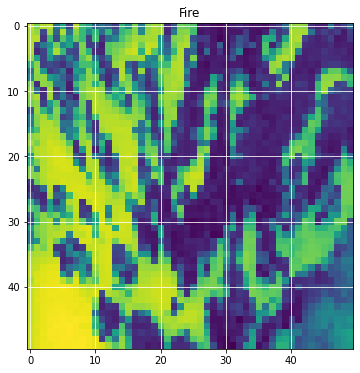

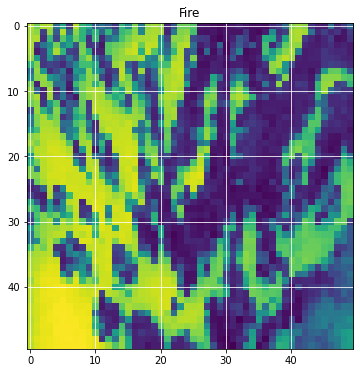

In [12]:
#Plots first image in red, green and blue
for i in range(3):
    plt.figure(figsize = (6,6))
    plt.imshow(fire_train[0,:,:,i])
    plt.grid(color = 'w')
    plt.title('Fire')

In [13]:
#Plots the mean pixel of the array
average = np.mean(no_fire_test[:,:,:,:])

In [14]:
print(average)

116.82017800766283


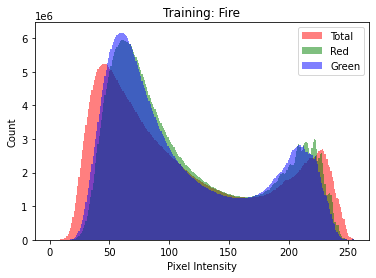

In [11]:
#View the pixel colour channel spread

#plt.hist(fire_train[:,:,:,:].ravel(), bins = 256, color = 'gray', alpha = 0.5)
plt.hist(fire_train[:,:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
plt.hist(fire_train[:,:, :, 1].ravel(), bins = 256, color = 'green',alpha = 0.5)
plt.hist(fire_train[:,:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5)
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Training: Fire')
plt.legend(['Total', 'Red', 'Green', 'Blue'])
plt.show()

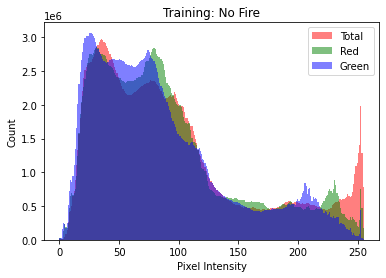

In [12]:
#View the pixel colour channel spread

#plt.hist(no_fire_train[:,:,:,:].ravel(), bins = 256, color = 'gray', alpha = 0.5)
plt.hist(no_fire_train[:,:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
plt.hist(no_fire_train[:,:, :, 1].ravel(), bins = 256, color = 'green',alpha = 0.5)
plt.hist(no_fire_train[:,:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5)
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Training: No Fire')
plt.legend(['Total', 'Red', 'Green', 'Blue'])
plt.show()

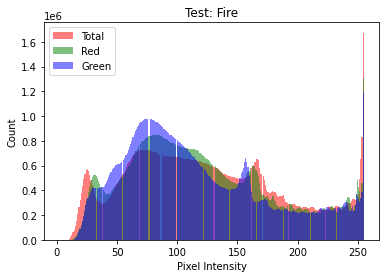

In [13]:
#View the pixel colour channel spread

#plt.hist(fire_test[:,:,:,:].ravel(), bins = 256, color = 'gray', alpha = 0.5)
plt.hist(fire_test[:,:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
plt.hist(fire_test[:,:, :, 1].ravel(), bins = 256, color = 'green',alpha = 0.5)
plt.hist(fire_test[:,:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5)
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Test: Fire')
plt.legend(['Total', 'Red', 'Green', 'Blue'])
plt.show()

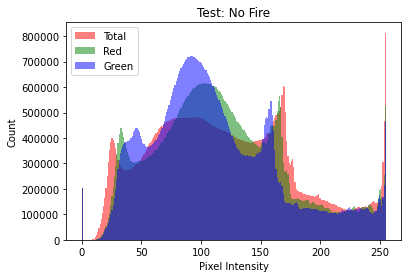

In [14]:
#View the pixel colour channel spread

#plt.hist(no_fire_test[:,:,:,:].ravel(), bins = 256, color = 'gray', alpha = 0.5)
plt.hist(no_fire_test[:,:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
plt.hist(no_fire_test[:,:, :, 1].ravel(), bins = 256, color = 'green',alpha = 0.5)
plt.hist(no_fire_test[:,:, :, 2].ravel(), bins = 256, color = 'blue', alpha = 0.5)
plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.title('Test: No Fire')
plt.legend(['Total', 'Red', 'Green', 'Blue'])
plt.show()

Text(0.5, 1.0, 'Training Set')

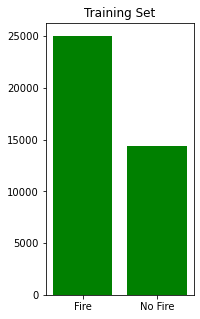

In [19]:
#Count of the images in the training set

names = ['Fire', 'No Fire']
train_values = [len(fire_train),len(no_fire_train)]
plt.figure(figsize=(9, 5))

plt.subplot(131)
plt.bar(names, train_values, color = 'g')
plt.title('Training Set')

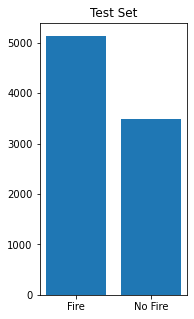

In [20]:
#Count of the images in the test set

names = ['Fire', 'No Fire']
test_values = [len(fire_test),len(no_fire_test)]
plt.figure(figsize=(9, 5))

plt.subplot(131)
plt.bar(names, test_values)
plt.title('Test Set')
plt.show()

In [21]:
print(f"Total Fire Images: {len(fire_train)}")
print(f"Total No_Fire Images: {len(no_fire_train)}")
print(f"Total Fire Images: {len(fire_test)}")
print(f"Total No_Fire Images: {len(no_fire_test)}")

Total Fire Images: 25018
Total No_Fire Images: 14357
Total Fire Images: 5137
Total No_Fire Images: 3480
